In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
import statsmodels.api as sm

In [3]:
data = pd.read_excel('birthweight_feature_set.xlsx')

In [83]:
data =  pd.DataFrame(data)

In [5]:
data.shape

(196, 18)

In [6]:
data.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [7]:
from scipy.interpolate  import lagrange

In [8]:

from scipy.interpolate import lagrange #导入拉格朗日插值函数

#自定义列向量插值函数

#s为列向量，n为被插值的位置，k为取前后的数据个数，默认为5

def ployinterp_column(s, n, k=5):

    y = s[list(range(n-k, n)) + list(range(n+1, n+1+k))] #取数

    y = y[y.notnull()] #剔除空值

    return lagrange(y.index, list(y))(n) #插值并返回插值结果

 

#逐个元素判断是否需要插值

for i in data.columns:

    for j in range(len(data)):

        if (data[i].isnull())[j]: #如果为空即插值。

            data[i][j] = ployinterp_column(data[i], j)


C:\Users\frank\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Outlier flag

fill_1 = data['meduc'].median()
fill_2 = data['npvis'].median()
fill_3 = data['feduc'].median()

data['meduc'] = data['meduc'].fillna(fill_1)
data['npvis'] = data['npvis'].fillna(fill_2)
data['feduc'] = data['feduc'].fillna(fill_3)

data['meduc'] = data['meduc'].fillna(fill_1)
data['npvis'] = data['npvis'].fillna(fill_2)
data['feduc'] = data['feduc'].fillna(fill_3)

In [9]:
data.isnull().any().any()

False

In [10]:
print(data.corr()[u'bwght'])

mage     -0.463811
meduc    -0.099778
monpre   -0.051827
npvis     0.097914
fage     -0.395985
feduc    -0.066503
omaps     0.250153
fmaps     0.252024
cigs     -0.572385
drink    -0.743125
male      0.114855
mwhte    -0.114388
mblck     0.126145
moth     -0.022065
fwhte    -0.040909
fblck     0.117581
foth     -0.078401
bwght     1.000000
Name: bwght, dtype: float64


birth_data = data.loc[:,['mage','meduc','monpre','npvis','fage','feduc','omaps','fmaps','cigs','drink','male','mwhte','mblck','moth','fwhte','fblck']]
birth_target = data.loc[:,'bwght']

In [50]:
birth_data = pd.DataFrame(data,columns=['mage','meduc','monpre','npvis','fage','feduc','omaps','fmaps','cigs','drink','male','mwhte','mblck','moth','fwhte','fblck','foth'])
birth_target = pd.DataFrame(data,columns=['bwght'])

birth_data = pd.DataFrame(data,columns=['mage','meduc','monpre','npvis','fage','feduc','omaps','fmaps','cigs','drink','male','mwhte','mblck','moth','fwhte','fblck','foth','out_mage','out_fage','out_feduc','out_monpre ','out_npvis ','out_omaps','out_fmaps','out_drink '])
birth_target = pd.DataFrame(data,columns=['bwght'])

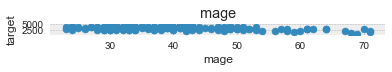

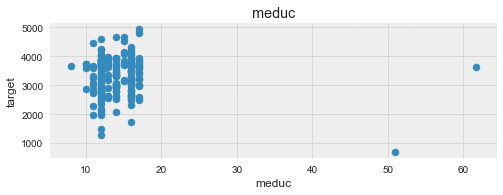

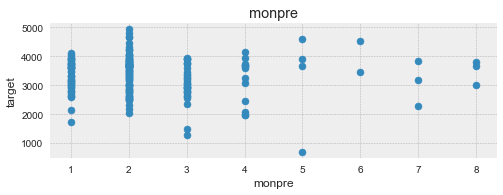

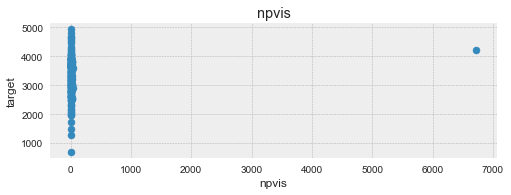

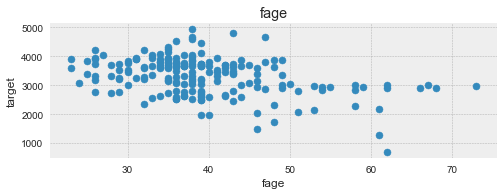

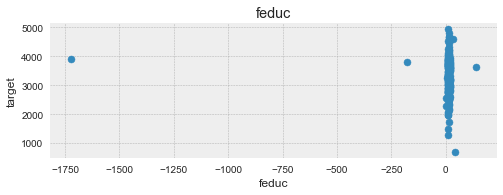

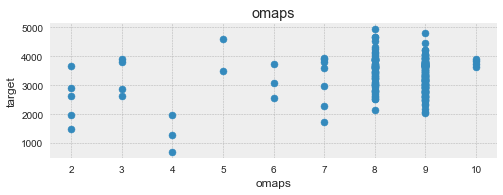

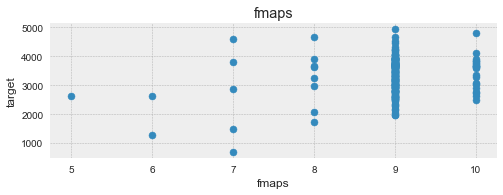

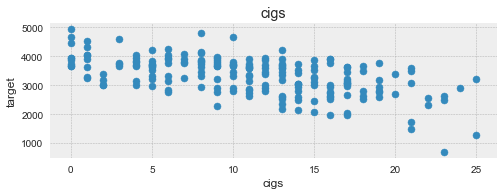

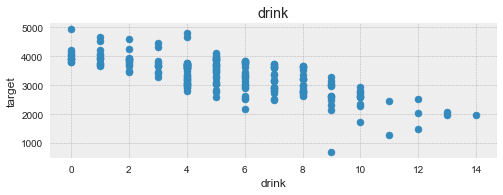

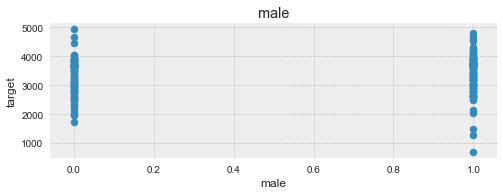

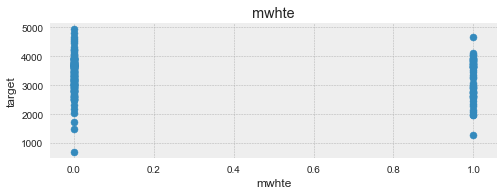

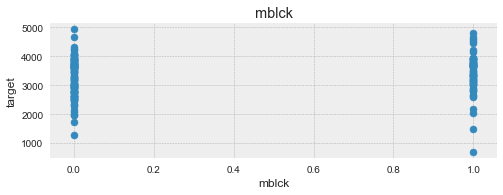

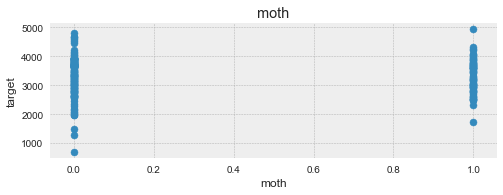

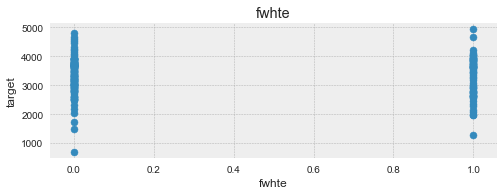

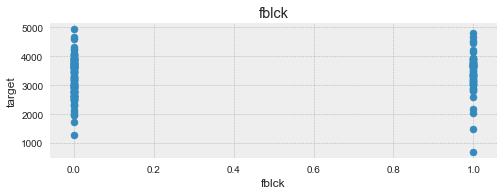

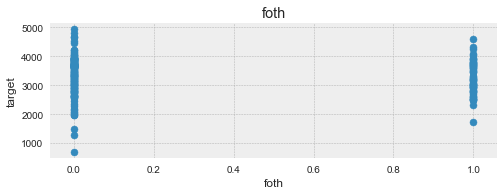

<Figure size 576x3600 with 0 Axes>

In [52]:
names = [i for i in birth_data]
for i, col in enumerate(names):
    plt.subplot(len(names),1, i+1)
    x = birth_data[col]
    y = birth_target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('target')
    plt.figure(figsize=(8,50))

In [12]:
X = birth_data
y = birth_target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(birth_data, birth_target, test_size=0.1,
                                                    random_state=508)

In [14]:
lm = linear_model.LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lm.intercept_

array([4205.06882819])

In [17]:
y_pred = lm.predict(X_test)

In [18]:
y_pred

array([[ 3593.01635506],
       [ 4243.81233204],
       [ 3275.61529342],
       [ 3534.38003306],
       [ 2882.80594754],
       [ 3954.87200195],
       [ 3721.23606401],
       [ 3478.71162295],
       [ 3687.64367808],
       [ 3567.58784462],
       [ 2652.55119201],
       [ 3427.76476984],
       [ 2379.74645481],
       [ 2641.39145079],
       [ 3348.70273159],
       [ 4083.87006717],
       [-2727.6774428 ],
       [ 3303.12089758],
       [ 3079.70999552],
       [ 3257.2533012 ]])

In [19]:
print('coefficient: \n', lm.coef_[0])

coefficient: 
 [-1.11836143e+01 -9.97706972e+00 -1.98285972e-01  3.35973482e-02
 -3.51409978e+00  3.66536632e+00  7.48720948e-01  9.21875573e+01
 -3.60786728e+01 -1.17707060e+02  3.58826508e+01  5.54556254e+01
 -3.25645956e+01 -2.28910298e+01 -4.53931690e+01  1.70741629e+01
  2.83190061e+01]


In [20]:
print('Mean squared error: %.2f \n' %np.mean((y_pred - y_test) **2))

Mean squared error: 2295864.63 



C:\Users\frank\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


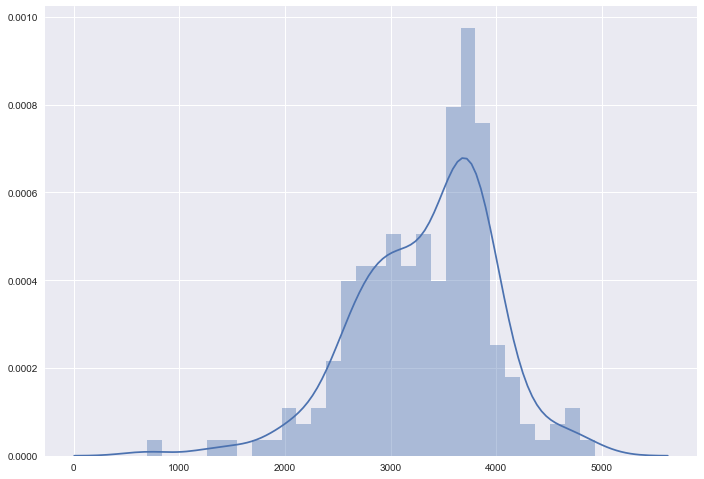

In [21]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(birth_target, bins=30)
plt.show()

RMSE

In [22]:
def rmse(yl, y_hat):
    y_actual = np.array(yl)
    y_pred = np.array(y_hat)
    error = (y_actual - y_pred)**2
    error_mean = round(np.mean(error))
    err_sq = np.sqrt(error_mean)
    return err_sq

In [23]:
rmse(y_test,y_pred)

1515.2112063999527

Residual plot

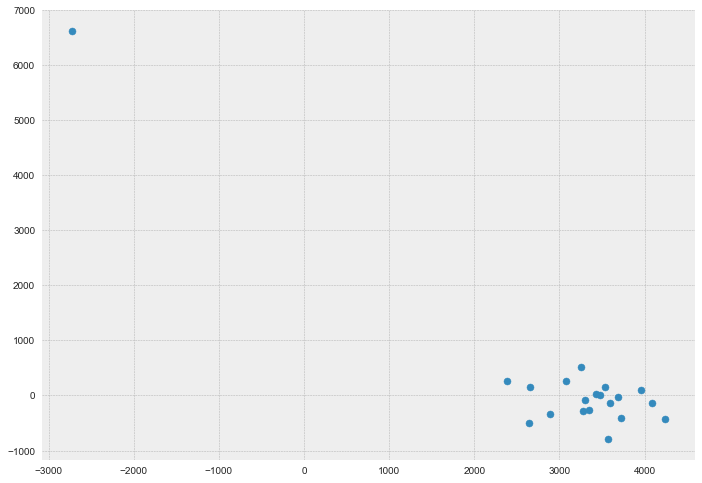

In [24]:
style.use('bmh')
plt.scatter(y_pred, y_test-y_pred)
plt.show()

In [71]:
X = sm.add_constant(X_train)

In [72]:
model = sm.OLS(y_train, X)

In [73]:
result = model.fit()

In [74]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     28.87
Date:                Sun, 03 Mar 2019   Prob (F-statistic):           6.82e-38
Time:                        21:46:32   Log-Likelihood:                -1276.7
No. Observations:                 176   AIC:                             2585.
Df Residuals:                     160   BIC:                             2636.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2523.0413    302.967      8.328      0.000    1924.712    3121.371
mage         -11.1836      3.483     -3.211      0.002     -18.062      -4.305
meduc         -9.9771      6.793     -1.469      0.144     -23.393       3.439
monpre        -0.1983     21.799     -0.009      0.993     -43.249      42.852
npvis          0.0336      0.055      0.612      0.542      -0.075       0.142
fage          -3.5141      3.769     -0.932      0.353     -10.958       3.930
feduc          3.6654      1.980      1.851      0.066      -0.244       7.575
omaps          0.7487     24.505      0.031      0.976     -47.646      49.144
fmaps         92.1876     58.152      1.585      0.115     -22.658     207.033
cigs         -36.0787      5.082     -7.100      0.000     -46.114     -26.043
drink       -117.7071     10.769    -10.930      0.000    -138.975     -96.439
male          35.8827     56.434      0.636      0.526     -75.570     147.335
mwhte        896.4694    132.382      6.772      0.000     635.027    1157.912
mblck        808.4492    126.995      6.366      0.000     557.646    1059.252
moth         818.1227    129.453      6.320      0.000     562.466    1073.780
fwhte        795.6206    118.187      6.732      0.000     562.213    1029.029
fblck        858.0879    140.812      6.094      0.000     579.998    1136.177
foth         869.3328    126.891      6.851      0.000     618.735    1119.930
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.024
Skew:                           0.089   Prob(JB):                        0.599
Kurtosis:                       3.329   Cond. No.                     5.02e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.8e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

F test 里，p-value < 0.05,这个模型的自变量和因变量存在一个显著的线性关系
t检验的值，p>|t|是P——value, 如果p_value < 0.05,自变量与因变量有显著的影响
R-square: 9.9%的准确率，比较不好的模型


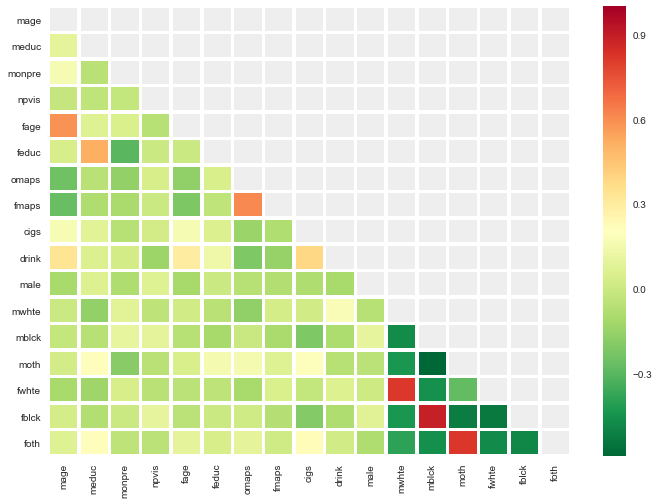

In [29]:
import seaborn

corr_df = X_train.corr(method='pearson')
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] =True
seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, mask=mask, linewidth=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [30]:
from sklearn import datasets
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [31]:
cv_lr_3 = cross_val_score(lm,birth_data,birth_target, cv = 3)

In [32]:
print(pd.np.mean(cv_lr_3))

-147.10661009492034


In [33]:
print('Training Score', lm.score(X_train, y_train).round(4))
print('Testing Score:', lm.score(X_test, y_test).round(4))

Training Score 0.7302
Testing Score: -7.8755


In [34]:
from sklearn.linear_model import RANSACRegressor,LinearRegression

In [35]:
seed = 1000

In [36]:
birth_data = pd.DataFrame(data,columns=['mage','meduc','monpre','npvis','fage','feduc','omaps','fmaps','cigs','drink','male','mwhte','mblck','moth','fwhte','fblck','foth'])
birth_target = pd.DataFrame(data,columns=['bwght'])

In [37]:
X = birth_data
y = birth_target

In [38]:
ransac = RANSACRegressor(base_estimator = LinearRegression(), 

                         min_samples = 80,

                         residual_threshold = 5.0,

                         max_trials = 100,

                         loss = 'absolute_loss',

                         random_state = seed)

ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=80, random_state=1000,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state= 508)

In [47]:
ransac.fit(X_train,y_train)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=80, random_state=1000,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [48]:
y_train_pre = ransac.predict(X_train)
y_test_pre = ransac.predict(X_test)

In [49]:

#R^2

from sklearn.metrics import r2_score

print('R^2 train: %.3f, test: %.3f' % (

        r2_score(y_train, y_train_pre),

        r2_score(y_test, y_test_pre)))


R^2 train: -0.186, test: -477.935


In [53]:
from sklearn.tree import DecisionTreeRegressor # Regression trees
from sklearn.tree import export_graphviz # Exports graphics
from sklearn.externals.six import StringIO # Saves an object in memory
from IPython.display import Image # Displays an image on the frontend
import pydotplus # Interprets dot objects

# Importing other libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # train/test split
from sklearn.model_selection import cross_val_score 

In [54]:
tree_full = DecisionTreeRegressor(random_state = 508)
tree_full.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=508, splitter='best')

In [55]:
print('Training Score', tree_full.score(X_train, y_train).round(4))
print('Testing Score:', tree_full.score(X_test, y_test).round(4))

Training Score 1.0
Testing Score: 0.2322


In [56]:
# Creating a tree with only two levels.
tree_2 = DecisionTreeRegressor(max_depth = 2,
                               random_state = 508)

tree_2_fit = tree_2.fit(X_train, y_train)


print('Training Score', tree_2.score(X_train, y_train).round(4))
print('Testing Score:', tree_2.score(X_test, y_test).round(4))

Training Score 0.5967
Testing Score: 0.312


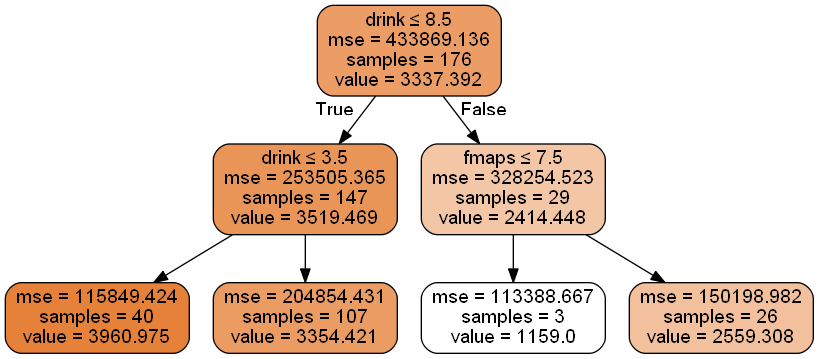

In [57]:
# Visualizing the tree
dot_data = StringIO()

    
export_graphviz(decision_tree = tree_2,
                out_file = dot_data,
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = birth_data.columns)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


Image(graph.create_png(),
      height = 500,
      width = 800)

In [60]:
tree_leaf_50 = DecisionTreeRegressor(criterion = 'mse',
                                     min_samples_leaf = 50,
                                     random_state = 508)

tree_leaf_50.fit(X_train, y_train)

print('Training Score', tree_leaf_50.score(X_train, y_train).round(4))
print('Testing Score:', tree_leaf_50.score(X_test, y_test).round(4))

Training Score 0.4163
Testing Score: 0.2464


In [58]:
def plot_feature_importances(model, train = X_train, export = False):
    fig, ax = plt.subplots(figsize=(12,9))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

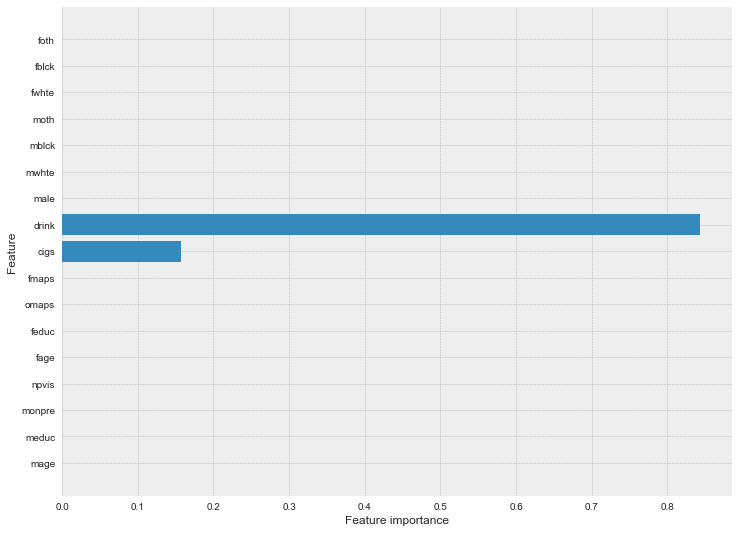

In [61]:
plot_feature_importances(tree_leaf_50,
                         train = X_train,
                         export = True)

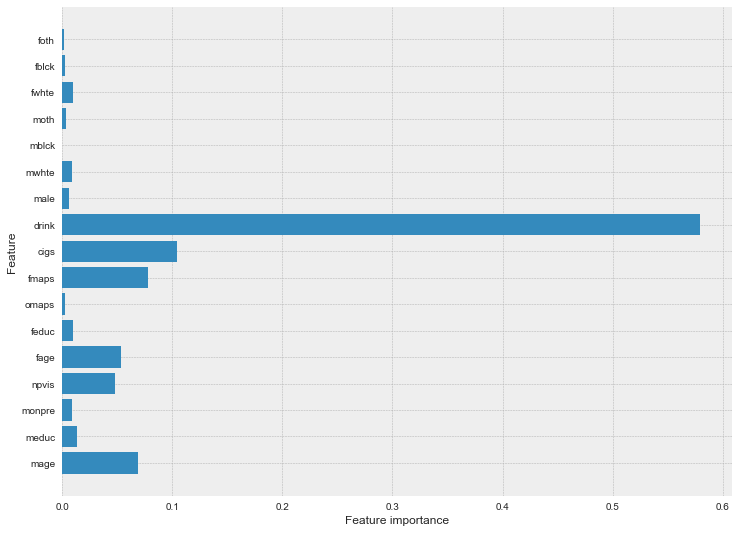

In [62]:
plot_feature_importances(tree_full,
                         train = X_train,
                         export = False)

In [64]:
cv_tree_3 = cross_val_score(tree_leaf_50,
                             birth_data,
                             birth_target,
                             cv = 3)

In [65]:
print(cv_tree_3)

[-4.77930751 -7.19190422 -5.97760962]


In [66]:
print(pd.np.mean(cv_tree_3).round(3))

-5.983


In [ ]:
data = 

In [85]:
# 复杂度可变
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=birth_data
    if power>=2:
        predictors.extend(['drink_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],birth_target['bwght'])
    y_pred = linreg.predict(birth_data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(birth_data['drink'],y_pred)
        plt.plot(birth_data['drink'],birth_target['bwght'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-birth_target['bwght'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [86]:
col = ['rss','intercept'] + ['coef_drink_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#定义作图的位置与模型的复杂度
models_to_plot = {1:231,3:232,6:233,8:234,11:235,14:236}

#画出来
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

KeyError: '[ 9 11 12 10 13 14 12 13  9  6 10  9 10 11  9  7  6 12  7  6  5 10  9 10\n  9  9 10  6  8  8 10  7  8  8  5  8 10  8  7  4 10  8  7  5  8  4  7  7\n  6  4  6  7 10  8  9  4  4  6  9  4  8  5  9  6  5  4  4  4  5  6  7  7\n  9  7  4  4  8  8  4  8  4  5  6  3  9  4  4  6  5  6  7  8  7  4  6  3\n  3  5  5  6  2  2  4  5  8  5  4  4  4  5  4  7  8  7  8  6  4  7  8  8\n  5  3  5  3  2  4  4  7  4  1  5  4  3  1  4  4  4  6  2  4  5  4  7  1\n  5  7  4  4  1  3  6  6  6  0  0  2  3  6  6  5  5  2  5  2  2  2  5  1\n  0  0  0  5  1  1  5  2  0  5  0  0  5  1  1  5  0  0  1  2  3  3  1  2\n  4  1  4  0] not in index'

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, discriminant_analysis, cross_validation


def test_lasso(*data):
    data = X_train, X_test, y_train, y_test 
    lassoRegression = linear_model.Lasso()
    lassoRegression.fit(X_train, y_train)
    print("权重向量:%s, b的值为:%.2f" % (lassoRegression.coef_, lassoRegression.intercept_))
    print("损失函数的值:%.2f" % np.mean((lassoRegression.predict(X_test) - y_test) ** 2))
    print("预测性能得分: %.2f" % lassoRegression.score(X_test, y_test))



C:\Users\frank\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:

#测试不同的α值对预测性能的影响
def test_lasso_alpha(*data):
    data=X_train, X_test, y_train, y_test 
    alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    scores = []
    for i, alpha in enumerate(alphas):
        lassoRegression = linear_model.Lasso(alpha=alpha)
        lassoRegression.fit(X_train, y_train)
        scores.append(lassoRegression.score(X_test, y_test))
    return alphas, scores



In [91]:
def show_plot(alphas, scores):
    figure = plt.figure()
    ax = figure.add_subplot(1, 1, 1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale("log")
    ax.set_title("Ridge")
    plt.show()

In [95]:
def load_data():
    return cross_validation.train_test_split(birth_data, birth_target, test_size=0.1, random_state=508)


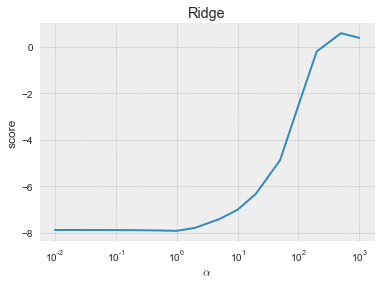

In [96]:
if __name__=='__main__':
    X_train, X_test, y_train, y_test = load_data()
    # 使用默认的alpha
    #test_lasso(X_train, X_test, y_train, y_test)
    # 使用自己设置的alpha
    alphas, scores = test_lasso_alpha(X_train, X_test, y_train, y_test)
    show_plot(alphas, scores)


In [97]:
from sklearn.metrics import roc_auc_score,roc_curve

In [98]:
roc_auc= roc_auc_score(y_test,y_pred)

ValueError: multiclass format is not supported